In [1]:
import matplotlib
%matplotlib inline

In [2]:
import pandas as pd
data = pd.DataFrame(data={'Precio': [100, 150, 230, 255, 300, 290, 310, 295, 298, 350],
                          'Metros': [490, 600, 650, 800, 900, 1100, 1400, 1200, 800, 450],
                          'Habitaciones': [1,2,3,3,4,1,2,3,2,2]})

y = data.Precio
X = data[['Metros', 'Habitaciones']]

In [3]:
y

0    100
1    150
2    230
3    255
4    300
5    290
6    310
7    295
8    298
9    350
Name: Precio, dtype: int64

In [4]:
import numpy as np
def H(x, w):
    if len(x.shape) > 1:
        return  np.sum(x*np.array(w), axis=1)
    else:
        return x*np.array(w)
    
def H(x, w):
    a = x*np.array(w)
    if len(x.shape) > 1:
        a = np.sum(a, axis=1)
    
    return a

In [5]:
X['Prediccion'] = H(X[['Metros', 'Habitaciones']], [0.2, 0.6])
X['Error'] = abs(X['Prediccion'] - y)
X

,Metros,Habitaciones,Prediccion,Error
0,490,1,98.6,1.4
1,600,2,121.2,28.8
2,650,3,131.8,98.2
3,800,3,161.8,93.2
4,900,4,182.4,117.6
5,1100,1,220.6,69.4
6,1400,2,281.2,28.8
7,1200,3,241.8,53.2
8,800,2,161.2,136.8
9,450,2,91.2,258.8


In [6]:
def J(X, y, w):
    return (0.5 / X.shape[0]) * sum((H(X,w) -y) ** 2)

J(X[['Metros', 'Habitaciones']], y, [0.1, 0.2])

17172.732000000004

Mejora encontrada: 53693.308499 (w=-0.069809)
Mejora encontrada: 51657.960935 (w=-0.062513)
Mejora encontrada: 44628.519291 (w=-0.036046)
Mejora encontrada: 25172.036490 (w=0.052362)
Mejora encontrada: 14352.605203 (w=0.120888)
Mejora encontrada: 8128.819971 (w=0.178583)
Mejora encontrada: 4727.048020 (w=0.231799)
Mejora encontrada: 3666.329265 (w=0.301497)
Mejora encontrada: 3595.343405 (w=0.293954)
Mejora encontrada: 3569.800048 (w=0.284757)
Mejora encontrada: 3569.388563 (w=0.286251)
Mejora encontrada: 3569.329515 (w=0.285955)
Mejora encontrada: 3569.325418 (w=0.285829)
Mejora encontrada: 3569.325218 (w=0.285849)


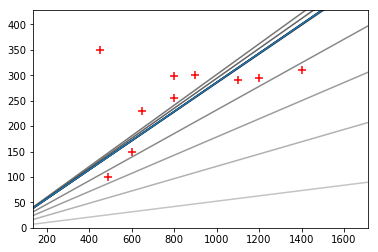

In [7]:
import random
import matplotlib.pyplot as plt

ax = plt.gca()
ax.set_ylim([min(0, y.min() - y.std()), y.max() + y.std()])
ax.set_xlim([X.Metros.min() - X.Metros.std(), X.Metros.max() + X.Metros.std()])

j_min = float('inf')
best_w = 0
history = []

num_iter=10000
for it in range(0, num_iter):
    cand_w = best_w + random.uniform(-0.1, 0.1)
    j = J(X.Metros, y, [cand_w])
    
    if j < j_min:
        print("Mejora encontrada: %f (w=%f)" % (j, cand_w))
        j_min = j
        best_w = cand_w
        history.append((cand_w))

plt.scatter(X.Metros, y, marker='+', color='r', s=50)
for i, (w) in enumerate(history[:-1]):
    X_plot = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    gray = 1 - (i/(len(history)-1))
    
    plt.plot(X_plot, X_plot*w, '-', color=str(gray))
    
X_plot = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
plt.plot(X_plot, X_plot*best_w, '-')
plt.show()

In [18]:
import numpy as np
import random
import sys

class RegresionLineal:
    
    def __init__(self, learning_rate=100):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        a = X*np.array(w)
        if len(X.shape) > 1:
            a = np.sum(a, axis=1)

        return a

    def _J(self, X, y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        return (0.5 / X.shape[0]) * sum((self._H(X,w) -y) ** 2)
    
    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde 
        # con el número  de elementos de la variable de respuesta
        if len(X) != len(y):
            raise Exception("El número de filas de X es diferente al de y")
        
        # Usaremos esta lista para guardar el progreso del ajuste
        self.history = []

        # Establecemos el valor del coste al inicio lo mayor posible    
        j_min = float("inf")
        
        # Inicializamos los pesos
        num_attr = 1 if len(X.shape) == 1 else X.shape[0]
        self.w = [.0] * num_attr
        current_w = [.0] * num_attr          
        
        for it in range(0,num_iter):
            # actualizamos los pesos aplicando el desfase de los pesos
            for iattr in range(num_attr):
                current_w[iattr] = self.w[iattr] + 
                random.uniform(-self.learning_rate,self.learning_rate)
            
            # calculamos el coste con los nuevos pesos
            j = self._J(X, y, current_w)

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            if j < j_min:
                if verbose:
                    print ("Mejora: %f (%s)" % (j, current_w))
                    
                j_min = j
                self.w = current_w[:]
                self.history.append(current_w[:])
            
        # si se pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        if plot and num_attr == 1:
            axes = plt.gca()
            axes.set_ylim([y.min() - y.std(), y.max() + y.std()])
            axes.set_xlim([X.min() - X.std(), X.max() + X.std()])

            plt.scatter(X, y, marker='+', color='r', s=200)
            
            for i, w in enumerate(self.history[:-1]):
                X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
                gray = 1-i/(len(self.history)-1)
                plt.plot(X_plot, self._H(X_plot, w), '-', color=str(gray))


            # Add correlation line
            X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
            plt.plot(X_plot, self._H(X_plot, self.w), '-', linewidth=2)

            
            plt.show()
            
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        raise Exception("No implement")


In [19]:
rl = RegresionLineal()
rl.fit(X, y)

In [20]:
rl.__dict__

{'history': [], 'learning_rate': 100}